In [142]:
import pandas as pd
import numpy as np
from langdetect import detect as langdetect
import random
seed = 42
np.random.seed(seed)
random.seed(seed)

In [143]:
cwa_path = '../../data/labeled/2018_-_Cities_Water_Actions.csv'
cwr_path = '../../data/labeled/2018_-_Cities_Water_Risks.csv'

In [144]:
cwa = pd.read_csv(cwa_path)
cwa.head()

,Account No,Organisation,City,Country,Region,Access,C40,Reporting Year,Risks to city's water supply,Adaptation action,Action description,City Location
0,1093,City of Atlanta,Atlanta,United States of America,North America,public,NaN,2018,Increased water stress or scarcity,Investment in existing water supply infrastruc...,"The city is building a new reservoir, fixing t...","(33.749, -84.388)"
1,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Conservation awareness and education,NaN,"(30.2672, -97.7431)"
2,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Conservation incentives,NaN,"(30.2672, -97.7431)"
3,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Water use restrictions,NaN,"(30.2672, -97.7431)"
4,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Efficiency regulations or standards,NaN,"(30.2672, -97.7431)"


In [145]:
cwr = pd.read_csv(cwr_path)
cwr.head()

,Account No,Organisation,City,Country,Region,Access,C40,Reporting year,Risks to city's water supply,Timescale,Magnitude,Risk description,Current population,Population year,City Location
0,1093,City of Atlanta,Atlanta,United States of America,North America,public,NaN,2018,Increased water stress or scarcity,Short-term,Serious,The city depends on one river for water supply...,450182.0,2017,"(33.749, -84.388)"
1,1093,City of Atlanta,Atlanta,United States of America,North America,public,NaN,2018,Higher water prices,Current,Serious,The water cost burden is felt across all ZIP c...,450182.0,2017,"(33.749, -84.388)"
2,1184,City of Austin,Austin,United States of America,North America,public,C40,2018,Increased water stress or scarcity,Medium-term,Extremely serious,NaN,1265974.0,2017,"(30.2672, -97.7431)"
3,1499,Ajuntament de Barcelona,Barcelona,Spain,Europe,public,C40,2018,Increased water stress or scarcity,Current,Extremely serious,The downscaling of the climate projections at ...,1604555.0,2015,"(41.3823, 2.1775)"
4,1499,Ajuntament de Barcelona,Barcelona,Spain,Europe,public,C40,2018,Declining water quality,Medium-term,Serious,A reduction in water resources availability c...,1604555.0,2015,"(41.3823, 2.1775)"


In [146]:
# Convert columns names to lowercase
cwa.columns = cwa.columns.str.lower().str.replace(" ", "_").str.replace("'","")
cwr.columns = cwr.columns.str.lower().str.replace(" ", "_").str.replace("'","")

In [147]:
cwr.isnull().sum()

account_no                       0
organisation                     0
city                             0
country                          0
region                           0
access                           0
c40                            504
reporting_year                   0
risks_to_citys_water_supply     40
timescale                       11
magnitude                      159
risk_description               107
current_population               0
population_year                  0
city_location                    0
dtype: int64

In [148]:
cwa.isnull().sum()

account_no                       0
organisation                     0
city                             0
country                          0
region                           0
access                           0
c40                            536
reporting_year                   0
risks_to_citys_water_supply     75
adaptation_action               19
action_description             146
city_location                    0
dtype: int64

In [149]:
id_columns = list(set(cwr.columns) & set(cwa.columns))
id_columns

['city',
 'city_location',
 'account_no',
 'c40',
 'access',
 'reporting_year',
 'risks_to_citys_water_supply',
 'organisation',
 'region',
 'country']

In [150]:
cwr[id_columns].isnull().sum()

city                             0
city_location                    0
account_no                       0
c40                            504
access                           0
reporting_year                   0
risks_to_citys_water_supply     40
organisation                     0
region                           0
country                          0
dtype: int64

In [151]:
cwa[id_columns].isnull().sum()

city                             0
city_location                    0
account_no                       0
c40                            536
access                           0
reporting_year                   0
risks_to_citys_water_supply     75
organisation                     0
region                           0
country                          0
dtype: int64

In [152]:
cwr['c40'] = cwr['c40'] == 'C40'
cwr[id_columns] = cwr[id_columns].fillna('nan')

In [153]:
cwa['c40'] = cwa['c40'] == 'C40'
cwa[id_columns] = cwa[id_columns].fillna('nan')

In [154]:
len(cwa[id_columns]), len(cwa[id_columns].drop_duplicates())


(685, 484)

In [155]:
len(cwr[id_columns]), len(cwr[id_columns].drop_duplicates())

(608, 578)

In [156]:
cwa_agg = cwa.groupby(id_columns).agg(set).reset_index()
cwr_agg = cwr.groupby(id_columns).agg(set).reset_index()
cwr_agg.magnitude = cwr_agg.magnitude.apply(lambda x: 'Extremely serious' if 'Extremely serious' in x  else ('Serious' if 'Serious' in x else list(x)[0]))

In [157]:
cwr_agg.magnitude

0               NaN
1               NaN
2               NaN
3           Serious
4      Less Serious
           ...     
573             NaN
574         Serious
575         Serious
576         Serious
577    Less Serious
Name: magnitude, Length: 578, dtype: object

In [158]:
cw_data = pd.merge(cwa_agg, cwr_agg, on=id_columns, how='outer')
list_columns = cw_data.iloc[0].apply(lambda x: isinstance(x, set))
list_columns = list_columns[list_columns].index
cw_data[list_columns] = cw_data[list_columns].applymap(lambda x: {np.nan} if pd.isna(x) else x)

In [159]:
cw_data.head()

,city,city_location,account_no,c40,access,reporting_year,risks_to_citys_water_supply,organisation,region,country,adaptation_action,action_description,timescale,magnitude,risk_description,current_population,population_year
0,Abasan Al-Kabira,"(31.3231, 34.344)",63616,False,public,2018,Declining water quality,Abasan Al-Kabira Municipality,Middle East,State of Palestine,{Diversifying water supply (including new sour...,{nan},{Current},NaN,{nan},{32000.0},{2017}
1,Abasan Al-Kabira,"(31.3231, 34.344)",63616,False,public,2018,Inadequate or aging infrastructure,Abasan Al-Kabira Municipality,Middle East,State of Palestine,{Investment in existing water supply infrastru...,{nan},{nan},NaN,{nan},{nan},{nan}
2,Abasan Al-Kabira,"(31.3231, 34.344)",63616,False,public,2018,Increased water stress or scarcity,Abasan Al-Kabira Municipality,Middle East,State of Palestine,{Water metering},{nan},{Short-term},NaN,{nan},{32000.0},{2017}
3,Abington,"(40.1241, -75.1195)",58485,False,public,2018,Increased water stress or scarcity,Abington Township,North America,United States of America,"{Conservation incentives, Conservation awarene...",{Rain Barrel The Town Program/Application for ...,{Medium-term},Less Serious,{Unknown as this has not been formally assesse...,{55310.0},{2010}
4,Abuja,"(9.07647, 7.39857)",36043,False,public,2018,Higher water prices,Abuja Federal Capital Territory,Africa,Nigeria,{Water metering},{nan},{Short-term},NaN,{nan},{2440000.0},{2017}


In [160]:
cw_data['city_location'] = cw_data['city_location'].apply(eval)
cw_data['latitude'] = cw_data['city_location'].apply(lambda x: x[0])
cw_data['longitude'] = cw_data['city_location'].apply(lambda x: x[1])
id_columns = [x for x in id_columns] + ['latitude','longitude']


In [161]:
cw_value_columns = [ x for x in cw_data.columns if x not in id_columns]
# Values that can be converted back to strings from sets

singular_cols = cw_data.set_index(id_columns)[list_columns].applymap(lambda x: len(x)==1).product() > 0
singular_cols

adaptation_action     False
action_description    False
timescale             False
risk_description      False
current_population     True
population_year        True
dtype: bool

In [162]:

singular_cols = cw_data.set_index(id_columns)[list_columns].applymap(lambda x: len(x)==1).product() > 0

In [163]:
# magnitude is nicely singular per id
cw_data.loc[:, singular_cols[singular_cols].index] = cw_data.loc[:, singular_cols[singular_cols].index].applymap(lambda x: list(x)[0])
print(singular_cols)

adaptation_action     False
action_description    False
timescale             False
risk_description      False
current_population     True
population_year        True
dtype: bool


In [164]:
def try_lang_detect_except(x):
    try:
        return (langdetect(x)=='en')
    except:
        return False
cw_data = cw_data.applymap(lambda x: set([t for t in x if not pd.isnull(t)  and  (t!='') and (t!='ERROR: #NAME?') and try_lang_detect_except(t)]) if isinstance(x,set) else x)

In [165]:
cw_data.risks_to_citys_water_supply = cw_data.risks_to_citys_water_supply.apply(lambda x: x.replace('Inadequate or ageing infrastructure','Inadequate or aging infrastructure') if isinstance(x, str) else x)

In [166]:
cw_data.iloc[0].adaptation_action

{'Diversifying water supply (including new sources)'}

In [167]:
nltk.wordpunct_tokenize('Diversifying water supply (including new sources)')

['Diversifying', 'water', 'supply', '(', 'including', 'new', 'sources', ')']

In [168]:

for token in nlp('Diversifying water supply (including new sources)'):
    print(token, token.is_oov)

Diversifying False
water False
supply False
( False
including False
new False
sources False
) False


In [174]:
cw_data

,city,city_location,account_no,c40,access,reporting_year,risks_to_citys_water_supply,organisation,region,country,adaptation_action,action_description,timescale,magnitude,risk_description,current_population,population_year,latitude,longitude
0,Abasan Al-Kabira,"(31.3231, 34.344)",63616,False,public,2018,Declining water quality,Abasan Al-Kabira Municipality,Middle East,State of Palestine,[Diversifying water supply including new sources],[],[],NaN,[],32000.0,2017.0,31.32310,34.34400
1,Abasan Al-Kabira,"(31.3231, 34.344)",63616,False,public,2018,Inadequate or aging infrastructure,Abasan Al-Kabira Municipality,Middle East,State of Palestine,[Investment in existing water supply infrastru...,[],[],NaN,[],NaN,NaN,31.32310,34.34400
2,Abasan Al-Kabira,"(31.3231, 34.344)",63616,False,public,2018,Increased water stress or scarcity,Abasan Al-Kabira Municipality,Middle East,State of Palestine,[],[],[Short term],NaN,[],32000.0,2017.0,31.32310,34.34400
3,Abington,"(40.1241, -75.1195)",58485,False,public,2018,Increased water stress or scarcity,Abington Township,North America,United States of America,"[Conservation incentives, Conservation awarene...",[Rain Barrel The Town Program Application for ...,[],Less Serious,[Unknown as this has not been formally assesse...,55310.0,2010.0,40.12410,-75.11950
4,Abuja,"(9.07647, 7.39857)",36043,False,public,2018,Higher water prices,Abuja Federal Capital Territory,Africa,Nigeria,[],[],[Short term],NaN,[],2440000.0,2017.0,9.07647,7.39857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Wellington,"(-41.2865, 174.776)",43937,False,public,2018,Inadequate or aging infrastructure,Wellington City Council,Southeast Asia and Oceania,New Zealand,[],[],[],NaN,[Wellington has a significant problem with agi...,209102.0,2017.0,-41.28650,174.77600
673,West Hollywood,"(34.09, -118.362)",58357,False,public,2018,Increased water stress or scarcity,City of West Hollywood,North America,United States of America,[],[],[Short term],NaN,[California is recovering from an unprecedente...,34399.0,2010.0,34.09000,-118.36200
674,West Palm Beach,"(26.7153, -80.0534)",55801,False,public,2018,Inadequate or aging infrastructure,City of West Palm Beach,North America,United States of America,[],[],[Short term],Serious,[We have seen increases in reports of flooding...,108161.0,2017.0,26.71530,-80.05340
675,Xalapa,"(20.1318, -98.7556)",832009,False,public,2018,Inadequate or aging infrastructure,Ayuntamiento de Xalapa,Latin America,Mexico,[],[],[],Serious,[],480841.0,2015.0,20.13180,-98.75560


In [175]:
to_drop = ['timescale','current_population','population_year']
cw_data.drop(columns=['timescale','current_population','population_year'],inplace=True)
singular_cols = [x for x in singular_cols if x in cw_data.columns]

In [176]:
value_columns = set([x for x in cw_value_columns if x not in to_drop] + ['risks_to_citys_water_supply'])
list_columns = cw_data.iloc[0].apply(lambda x: isinstance(x, list))
list_columns = list_columns[list_columns].index
len_columns = set()
for x in value_columns.copy():
    if x in list_columns:
        cw_data[x+'_n'] = cw_data[x].apply(lambda x: len(x) if x else 1)
        len_columns.add(x+'_n')
value_columns = value_columns.union(len_columns)
value_columns

{'action_description',
 'action_description_n',
 'adaptation_action',
 'adaptation_action_n',
 'magnitude',
 'risk_description',
 'risk_description_n',
 'risks_to_citys_water_supply'}

In [177]:
c40_data = cw_data[cw_data['c40']].copy()

In [178]:
list_nulls = c40_data[list_columns].applymap(lambda x: len(x) == 0)
list_nulls.mean()

adaptation_action     0.375000
action_description    0.464286
risk_description      0.366071
dtype: float64

In [179]:
list_nulls.shape

(112, 3)

In [180]:
total_nulls = pd.concat([c40_data[id_columns], list_nulls],axis=1)


In [181]:
c40_data['magnitude'].unique()

array(['Extremely serious', 'Serious', nan, 'Less Serious'], dtype=object)

In [182]:
c40_risks = c40_data[id_columns+['magnitude']].copy()
c40_risks['low'] = c40_risks['magnitude'] == 'Less Serious'
c40_risks['medium'] = c40_risks['magnitude'] == 'Serious'
c40_risks['high'] = c40_risks['magnitude'] == 'Extremely serious'
c40_risks['unknown'] = c40_risks['magnitude'].isna()
c40_risks = c40_risks.drop(columns=['magnitude']).groupby([x for x in id_columns if x!="risks_to_citys_water_supply"]).agg(sum).reset_index()
c40_risks

,city,city_location,account_no,c40,access,reporting_year,organisation,region,country,latitude,longitude,low,medium,high,unknown
0,Addis Ababa,"(9.02887, 38.7544)",31146,True,public,2018,Addis Ababa City Administration,Africa,Ethiopia,9.02887,38.75440,0,3,0,0
1,Amman,"(31.9454, 35.9284)",54337,True,public,2018,Greater Amman Municipality,Middle East,Jordan,31.94540,35.92840,0,0,2,0
2,Auckland,"(-36.8153, 174.742)",43932,True,public,2018,Auckland Council,Southeast Asia and Oceania,New Zealand,-36.81530,174.74200,0,3,0,1
3,Austin,"(30.2672, -97.7431)",1184,True,public,2018,City of Austin,North America,United States of America,30.26720,-97.74310,0,0,1,0
4,Bangkok,"(13.7712, 100.556)",31150,True,public,2018,Bangkok Metropolitan Administration,Southeast Asia and Oceania,Thailand,13.77120,100.55600,1,0,0,0
5,Barcelona,"(41.3823, 2.1775)",1499,True,public,2018,Ajuntament de Barcelona,Europe,Spain,41.38230,2.17750,0,3,1,1
6,Cape Town,"(-33.9253, 18.4239)",35858,True,public,2018,City of Cape Town,Africa,South Africa,-33.92530,18.42390,0,0,1,0
7,Changwon,"(35.1542, 126.949)",31186,True,public,2018,Changwon City,East Asia,Republic of Korea,35.15420,126.94900,0,1,0,0
8,City of Melbourne,"(-37.8141, 144.963)",31109,True,public,2018,City of Melbourne,Southeast Asia and Oceania,Australia,-37.81410,144.96300,0,2,0,0
9,City of Sydney,"(-33.8675, 151.207)",31114,True,public,2018,City of Sydney,Southeast Asia and Oceania,Australia,-33.86750,151.20700,0,5,0,1


In [183]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import sent_tokenize, word_tokenize

In [184]:
import spacy
try:
    nlp = spacy.load("en_core_web_md")
except:
    spacy.cli.download('en_core_web_md')
    nlp = spacy.load("en_core_web_md")

In [185]:
class SimilarityAnalysis:
    def __init__(self):
        self.similarity_vectors = None
        
    def fit(self, description):
        ret = description.apply(lambda x:nlp('.'.join(x)))
        self.similarity_vectors = [x for x in ret if x]
        return self
    
    def transform(self, description):
        ret = description.apply(lambda x:nlp('.'.join(x)))
        ret = np.vstack(ret.apply(lambda x: [(x.similarity(y) if x else np.nan) for y in self.similarity_vectors]))
        return ret
    
    def fit_transform(self,description):
        ret = description.apply(lambda x:nlp('.'.join(x)))
        self.similarity_vectors = [x for x in ret if x]
        ret = ret.apply(lambda x: [(x.similarity(y) if x else np.nan) for y in self.similarity_vectors])
        ret = np.vstack(ret)
        return ret

def create_vector(description):
    return SimilarityAnalysis().fit_transform(description)

In [186]:
c40_data_action_description = create_vector(c40_data.action_description)
c40_data_adaptation_action = create_vector(c40_data.adaptation_action)

In [187]:
c40_data.risks_to_citys_water_supply = c40_data.risks_to_citys_water_supply.apply(lambda x: np.nan if x=='nan' else x)

In [188]:
c40_data[c40_data.risks_to_citys_water_supply.isnull()]

,city,city_location,account_no,c40,access,reporting_year,risks_to_citys_water_supply,organisation,region,country,adaptation_action,action_description,magnitude,risk_description,latitude,longitude,adaptation_action_n,action_description_n,risk_description_n
130,Dhaka,"(23.8103, 90.4125)",50782,True,public,2018,NaN,Dhaka City,South and West Asia,Bangladesh,[Stormwater management natural or man made inf...,[Embankment is constructed around Dhaka City t...,NaN,[Increases water born diseases],23.8103,90.4125,1,1,1
217,Jakarta,"(-6.1751, 106.865)",31166,True,public,2018,NaN,Jakarta City Government,Southeast Asia and Oceania,Indonesia,[Other Stormwater management natural or man ma...,[Restore damaged and lost water ecosystems suc...,NaN,[Increased frequency of rain affecting the are...,-6.1751,106.8650,1,1,1
218,Johannesburg,"(-26.2041, 28.0473)",31115,True,public,2018,NaN,City of Johannesburg,Africa,South Africa,[Water use restrictions],[A by law that effects water restrictions is i...,NaN,[],-26.2041,28.0473,1,1,1
226,Kolkata,"(22.5726, 88.3639)",35904,True,public,2018,NaN,Kolkata Metropolitan Area,South and West Asia,India,[Stormwater management natural or man made inf...,[Complete restriction in use of Ground water M...,NaN,[Kolkata is currently ranked as the third most...,22.5726,88.3639,2,2,2
317,Oslo,"(59.9139, 10.7522)",14088,True,public,2018,NaN,City of Oslo,Europe,Norway,[Diversifying water supply including new sourc...,[Small scale project to implement water also i...,NaN,[],59.9139,10.7522,3,4,1
349,"Portland, OR","(45.52, -122.682)",14874,True,public,2018,NaN,"City of Portland, OR",North America,United States of America,[Watershed preservation],[Portland seeks to manage the watershed in way...,NaN,[Portland has a secondary redundant groundwate...,45.5200,-122.6820,1,1,1
441,Tokyo,"(35.41, 139.41)",31111,True,public,2018,NaN,Tokyo Metropolitan Government,East Asia,Japan,[],[Implementing measures against flood],Serious,[],35.4100,139.4100,1,1,1


In [189]:
c40_data.risks_to_citys_water_supply.unique()

array(['Increased water demand', 'Increased water stress or scarcity',
       'Declining water quality', 'Inadequate or aging infrastructure',
       'Higher water prices', nan, 'Energy supply issues', 'Regulatory'],
      dtype=object)

In [190]:
cw_value_columns

['adaptation_action',
 'action_description',
 'timescale',
 'magnitude',
 'risk_description',
 'current_population',
 'population_year']

In [43]:
value_columns

{'action_description',
 'action_description_n',
 'adaptation_action',
 'adaptation_action_n',
 'magnitude',
 'risk_description',
 'risk_description_n',
 'risks_to_citys_water_supply'}

In [192]:
analyses = {x:SimilarityAnalysis() for x in value_columns if x in list_columns}
vectorized = np.hstack([analyses[x].fit_transform(c40_data[x]) for x in value_columns if x in list_columns])

In [193]:
cols_to_encode =  [x for x in value_columns if x not in list_columns and x not in len_columns]
c40_data[cols_to_encode] = c40_data[cols_to_encode].fillna('nan')
encoders = {x:LabelEncoder().fit(c40_data[x].fillna('nan')) for x in cols_to_encode}

In [194]:
encoded = np.array([encoders[x].transform(c40_data[x]) for x in encoders]).T.astype(float)
for t in range(len(cols_to_encode)):
    encoded[encoded[:,t] == np.where(encoders[cols_to_encode[t]].classes_=='nan')[0]] = np.nan

In [195]:
lab_freqs = c40_data[cols_to_encode].groupby(cols_to_encode,as_index=False).size()
lab_freqs

,risks_to_citys_water_supply,magnitude,size
0,Declining water quality,Less Serious,2
1,Declining water quality,Serious,9
2,Declining water quality,nan,3
3,Energy supply issues,Extremely serious,1
4,Energy supply issues,Serious,1
5,Higher water prices,Extremely serious,1
6,Higher water prices,Less Serious,1
7,Higher water prices,Serious,1
8,Higher water prices,nan,3
9,Inadequate or aging infrastructure,Extremely serious,3


In [196]:
whole = np.hstack([encoded, vectorized, c40_data[len_columns]])

In [299]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest


class LabeledDatasetImputer:
    """
    Imputes missing data on y. Assumes also missing data on X. Uses two different types of imputation, as it assumes that y is Categorical
    k_features_per_label: the number of features to keep from X for the imputation
    """
    def __init__(self, k_features_per_label=40,verbose=0):
        self.x_imputer = None
        self.y_imputer = None
        self.verbose = verbose
        self.selection_mask = None
        self.k_features_per_label = k_features_per_label
    
    def create_selection_mask(self, X, y):
        if not self.k_features_per_label:
            return np.zeros(X.shape[1])==0
        selection_mask = None
        for cnt in range(y.shape[1]):
            labeled = ~np.isnan(y[:,cnt])
            _y = y[labeled,cnt]
            _x = X[labeled,:]
            
            selector = SelectKBest(k=self.k_features_per_label).fit(np.nan_to_num(_x), _y)
            if selection_mask is None:
                selection_mask = selector.get_support()
            else:
                selection_mask = (selection_mask + selector.get_support())>0
        return selection_mask
    
    def fit_transform(self, X, y, ret_imputed_x=False):
        """
        X: nxp matrix
        y: nxv matrix
        Both matrices are allowed to have missing values
        if `ret_imputed_x`, return (imputed_x,imputed_y), otherwise return imputed_y
        """
        print("Applying feature selection..")
        self.selection_mask = self.create_selection_mask(X, y)
        print("Creating imputed X using KNeighborsRegressor..")
        self.x_imputer = IterativeImputer(KNeighborsRegressor(),initial_strategy='most_frequent',verbose=self.verbose, n_nearest_features=200,random_state=seed,skip_complete=True)
        imputed_x = self.x_imputer.fit_transform(X[:, self.selection_mask])
        print("Creating imputed Y using RandomForestClassifier..")
        self.y_imputer = IterativeImputer(estimator=RandomForestClassifier(), 
                           initial_strategy='most_frequent',
                           max_iter=10, random_state=seed,skip_complete=True,verbose=self.verbose)
        imputed_y = self.y_imputer.fit_transform(np.hstack([y, imputed_x]))[:,:y.shape[1]]
        if ret_imputed_x:
            return imputed_x, imputed_y
        return imputed_y

    def transform(self, X, y, ret_imputed_x=False):
        """
        X: nxp matrix
        y: nxv matrix
        Both matrices are allowed to have missing values
        if `ret_imputed_x`, return (imputed_x,imputed_y), otherwise return imputed_y
        """
        imputed_x = self.x_imputer.transform(X[:,self.selection_mask])
        ret = self.y_imputer.transform(np.hstack([y, imputed_x]))[:,:y.shape[1]]
        if ret_imputed_x:
            return imputed_x, ret
        return ret

In [300]:
imputer = LabeledDatasetImputer(verbose=2,k_features_per_label=0)
continuous_imputed, y = imputer.fit_transform(whole[:,2:], whole[:,:2], ret_imputed_x=True)

Applying feature selection..
Creating imputed X using KNeighborsRegressor..
[IterativeImputer] Completing matrix with shape (112, 204)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.56
[IterativeImputer] Change: 17.32806130360211, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 2/10, elapsed time 1.15
[IterativeImputer] Change: 5.653043338877532, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 3/10, elapsed time 1.75
[IterativeImputer] Change: 4.030906696771074, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 4/10, elapsed time 2.26
[IterativeImputer] Change: 4.3755293453757655, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 5/10, elapsed time 2.84
[IterativeImputer] Change: 1.2559478450336115, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 6/10, elapsed time 3.36
[IterativeImputer] Change: 0.3094366659459187, scaled tolerance: 0.011 
[IterativeImputer] Ending imputati

/home/vaslem/code/Modern Data Analytics/.venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[IterativeImputer] Ending imputation round 1/10, elapsed time 0.24
[IterativeImputer] Change: 5.0, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.43
[IterativeImputer] Change: 5.0, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.62
[IterativeImputer] Change: 5.0, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.81
[IterativeImputer] Change: 3.0, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 5/10, elapsed time 1.01
[IterativeImputer] Change: 5.0, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 6/10, elapsed time 1.19
[IterativeImputer] Change: 5.0, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 7/10, elapsed time 1.38
[IterativeImputer] Change: 3.0, scaled tolerance: 0.011 
[IterativeImputer] Ending imputation round 8/10, elapsed time 1.60
[IterativeImputer] Change: 5.0, scaled tolerance: 0.011 
[Iterati

/home/vaslem/code/Modern Data Analytics/.venv/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [301]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
simple_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=100, random_state=seed))
scoring = 'accuracy' 
scores = cross_val_score(simple_model, continuous_imputed, y[:,cols_to_encode.index('magnitude')], cv=5,scoring=scoring)
np.mean(scores)

0.7142292490118578

In [302]:
y[:,0]

array([4., 5., 0., 5., 5., 5., 5., 0., 3., 4., 5., 5., 5., 4., 5., 5., 5.,
       5., 5., 5., 5., 3., 3., 5., 5., 5., 5., 5., 5., 0., 3., 5., 5., 5.,
       5., 5., 5., 0., 1., 2., 5., 4., 5., 6., 4., 5., 0., 5., 5., 5., 0.,
       5., 5., 5., 5., 5., 5., 5., 6., 5., 5., 5., 5., 5., 5., 5., 5., 0.,
       5., 5., 0., 3., 5., 0., 5., 5., 0., 5., 5., 5., 3., 4., 5., 3., 3.,
       2., 3., 4., 6., 3., 5., 3., 5., 0., 2., 3., 4., 3., 3., 3., 6., 3.,
       0., 3., 1., 3., 3., 0., 5., 6., 3., 3.])

(206, 206)


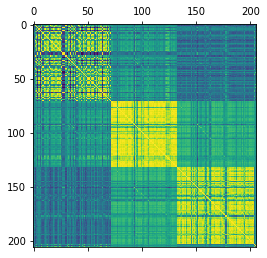

In [303]:
import matplotlib.pyplot as plt
flg = np.all(~np.isnan(whole),axis=1), np.hstack([[True, True], imputer.selection_mask[:]])
corr = np.corrcoef(whole[flg[0],:][:,flg[1]].T)
print(corr.shape)
plt.matshow(corr)

In [304]:
imputed = np.array([
    encoders[x].inverse_transform(
    y[:, c].astype(int)
 ) for c,x in enumerate(cols_to_encode)]).T

In [305]:
c40_data_imputed = c40_data.copy()

In [306]:
c40_data_imputed[cols_to_encode] = imputed

In [307]:
c40_data_imputed

,city,city_location,account_no,c40,access,reporting_year,risks_to_citys_water_supply,organisation,region,country,adaptation_action,action_description,magnitude,risk_description,latitude,longitude,adaptation_action_n,action_description_n,risk_description_n
14,Amman,"(31.9454, 35.9284)",54337,True,public,2018,Increased water demand,Greater Amman Municipality,Middle East,Jordan,[Efficiency regulations or standards],[the water company which supervises and manage...,Extremely serious,[Amman has had a rapidly rising population due...,31.9454,35.9284,1,1,1
15,Amman,"(31.9454, 35.9284)",54337,True,public,2018,Increased water stress or scarcity,Greater Amman Municipality,Middle East,Jordan,"[Water use restrictions, Use of non potable wa...",[All water supplies are metered and charged ac...,Extremely serious,[Jordan is one of the most water deprived coun...,31.9454,35.9284,2,3,1
34,Auckland,"(-36.8153, 174.742)",43932,True,public,2018,Declining water quality,Auckland Council,Southeast Asia and Oceania,New Zealand,[Other],[There are a range of actions in place to addr...,Serious,[As detailed in the Risks and Adaptation secti...,-36.8153,174.7420,1,1,1
35,Auckland,"(-36.8153, 174.742)",43932,True,public,2018,Increased water stress or scarcity,Auckland Council,Southeast Asia and Oceania,New Zealand,[Diversifying water supply including new sources],[Climate change strategies in relation to wate...,Serious,[],-36.8153,174.7420,1,1,1
36,Auckland,"(-36.8153, 174.742)",43932,True,public,2018,Increased water stress or scarcity,Auckland Council,Southeast Asia and Oceania,New Zealand,[Other],[Ltd operates a metropolitan security of suppl...,Serious,[Auckland faces unprecedented pressures from p...,-36.8153,174.7420,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,Santiago,"(-33.4489, -70.6693)",31180,True,public,2018,Declining water quality,RegiÃ³n Metropolitana de Santiago,Latin America,Chile,[],[],Serious,[Because of its sensitivity basin could suffer...,-33.4489,-70.6693,1,1,1
645,Santiago,"(-33.4489, -70.6693)",31180,True,public,2018,Increased water stress or scarcity,RegiÃ³n Metropolitana de Santiago,Latin America,Chile,[],[],Serious,[The underground aquifers are drying up especi...,-33.4489,-70.6693,1,1,1
646,Santiago,"(-33.4489, -70.6693)",31180,True,public,2018,Regulatory,RegiÃ³n Metropolitana de Santiago,Latin America,Chile,[],[],Serious,[The chilean water system regulation is based ...,-33.4489,-70.6693,1,1,1
664,Tokyo,"(35.41, 139.41)",31111,True,public,2018,Inadequate or aging infrastructure,Tokyo Metropolitan Government,East Asia,Japan,[],[],Serious,[],35.4100,139.4100,1,1,1


In [308]:
imp_lab_freqs = c40_data_imputed[cols_to_encode].groupby(cols_to_encode,as_index=False).size()
imp_ret = pd.merge(lab_freqs, imp_lab_freqs,suffixes=('','_imp'), how='right',on=cols_to_encode)
imp_ret

,risks_to_citys_water_supply,magnitude,size,size_imp
0,Declining water quality,Less Serious,2,2
1,Declining water quality,Serious,9,11
2,Energy supply issues,Extremely serious,1,1
3,Energy supply issues,Serious,1,1
4,Higher water prices,Extremely serious,1,1
5,Higher water prices,Less Serious,1,1
6,Higher water prices,Serious,1,1
7,Inadequate or aging infrastructure,Extremely serious,3,3
8,Inadequate or aging infrastructure,Less Serious,2,2
9,Inadequate or aging infrastructure,Serious,8,16


In [309]:
cw_data[cols_to_encode] = cw_data[cols_to_encode].fillna('nan')
cw_data['risks_to_citys_water_supply'] = cw_data['risks_to_citys_water_supply'].apply(lambda x: x if x in encoders['risks_to_citys_water_supply'].classes_ else 'nan')
encoded = np.array([encoders[x].transform(cw_data[x]) for x in encoders]).T.astype(float)
for t in range(len(cols_to_encode)):
    encoded[encoded[:,t] == np.where(encoders[cols_to_encode[t]].classes_=='nan')[0]] = np.nan

In [310]:
all_vectorized = np.hstack([analyses[x].transform(cw_data[x]) for x in value_columns if x in list_columns])

In [311]:
all_imputed_x, all_imputed_y  = imputer.transform(np.hstack([all_vectorized,cw_data[len_columns]]), encoded, ret_imputed_x=True)

[IterativeImputer] Completing matrix with shape (677, 204)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.77
[IterativeImputer] Ending imputation round 2/10, elapsed time 1.48
[IterativeImputer] Ending imputation round 3/10, elapsed time 2.47
[IterativeImputer] Ending imputation round 4/10, elapsed time 2.88
[IterativeImputer] Ending imputation round 5/10, elapsed time 3.34
[IterativeImputer] Ending imputation round 6/10, elapsed time 3.85
[IterativeImputer] Ending imputation round 7/10, elapsed time 4.32
[IterativeImputer] Ending imputation round 8/10, elapsed time 4.75
[IterativeImputer] Ending imputation round 9/10, elapsed time 5.22
[IterativeImputer] Ending imputation round 10/10, elapsed time 5.66
[IterativeImputer] Completing matrix with shape (677, 206)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.08
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.11
[Iterative

In [312]:
all_imputed_y_dec = np.array([
    encoders[x].inverse_transform(
    all_imputed_y[:, c].astype(int)
 ) for c,x in enumerate(cols_to_encode)]).T

In [313]:
cw_data_imputed = cw_data.copy()
cw_data_imputed[cols_to_encode] = all_imputed_y_dec

(206, 206)


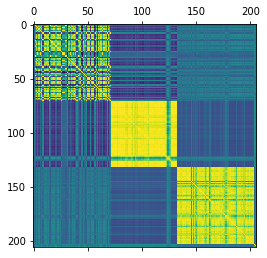

In [314]:
import matplotlib.pyplot as plt
corr = np.corrcoef(np.hstack([all_imputed_y, all_imputed_x]).T)
print(corr.shape)
plt.matshow(corr)

In [315]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
scores = cross_val_score(simple_model, all_imputed_x, all_imputed_y[:,0], cv=5,scoring=scoring)
np.mean(scores)

0.5893137254901961

In [316]:
final_labeled_data = cw_data_imputed[['city','latitude','longitude','country','c40','region','magnitude','risks_to_citys_water_supply']].copy()
final_labeled_data.rename(columns={'magnitude': 'risk','risks_to_citys_water_supply': 'description'},inplace=True)

In [317]:
final_labeled_data

,city,latitude,longitude,country,c40,region,risk,description
0,Abasan Al-Kabira,31.32310,34.34400,State of Palestine,False,Middle East,Serious,Increased water stress or scarcity
1,Abasan Al-Kabira,31.32310,34.34400,State of Palestine,False,Middle East,Serious,Inadequate or aging infrastructure
2,Abasan Al-Kabira,31.32310,34.34400,State of Palestine,False,Middle East,Serious,Inadequate or aging infrastructure
3,Abington,40.12410,-75.11950,United States of America,False,North America,Less Serious,Increased water stress or scarcity
4,Abuja,9.07647,7.39857,Nigeria,False,Africa,Serious,Inadequate or aging infrastructure
...,...,...,...,...,...,...,...,...
672,Wellington,-41.28650,174.77600,New Zealand,False,Southeast Asia and Oceania,Serious,Inadequate or aging infrastructure
673,West Hollywood,34.09000,-118.36200,United States of America,False,North America,Serious,Inadequate or aging infrastructure
674,West Palm Beach,26.71530,-80.05340,United States of America,False,North America,Serious,Inadequate or aging infrastructure
675,Xalapa,20.13180,-98.75560,Mexico,False,Latin America,Serious,Inadequate or aging infrastructure


In [318]:
cw_lab_freqs = cw_data[cols_to_encode].groupby(cols_to_encode,as_index=False).size()
imp_cw_lab_freqs = cw_data_imputed[cols_to_encode].groupby(cols_to_encode,as_index=False).size()
imp_cw_ret = pd.merge(cw_lab_freqs, imp_cw_lab_freqs,suffixes=('','_imp'), how='right',on=cols_to_encode)
imp_cw_ret

,risks_to_citys_water_supply,magnitude,size,size_imp
0,Declining water quality,Extremely serious,23,23
1,Declining water quality,Less Serious,18,18
2,Declining water quality,Serious,57,66
3,Energy supply issues,Extremely serious,1,1
4,Energy supply issues,Less Serious,1,1
5,Energy supply issues,Serious,5,5
6,Higher water prices,Extremely serious,2,2
7,Higher water prices,Less Serious,10,10
8,Higher water prices,Serious,14,14
9,Inadequate or aging infrastructure,Extremely serious,12,13
